<a href="https://colab.research.google.com/github/Rawphy/Analysis-of-Climatic-Data-from-France-Exploring-Spatial-Attributes-and-Temperature-Relationships/blob/main/Climate_Sentiment_Aanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

rawsheed91_climate_sentiment_data_path = kagglehub.dataset_download('rawsheed91/climate-sentiment-data')
rawsheed91_annotated_doc_path = kagglehub.dataset_download('rawsheed91/annotated-doc')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-sentiment-data/climate_posts orginal.xlsx
/kaggle/input/annotated-doc/Annotated_doc.xlsx


In [ ]:
!pip install nltk

In [ ]:
import re
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
# Download the 'punkt_tab' data for word tokenization
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import matplotlib.pyplot as plt
!pip install openpyxl

In [ ]:
file_path = '/kaggle/input/climate-sentiment-data/climate_posts orginal.xlsx'
df = pd.read_excel(file_path)
print(df.head())

  post_number     post_id            datetime          user  \
0           1  18449276.0 2011-06-08 11:56:00  Victory Pete   
1           2  18449299.0 2011-06-08 11:59:00   redhotpearl   
2           3  18449352.0 2011-06-08 12:04:00       debogus   
3           4  18449405.0 2011-06-08 12:09:00  Victory Pete   
4           5  18449463.0 2011-06-08 12:16:00    Looooeeee!   

                                                text  
0  Have you noticed how extreme the weather has b...  
1  I don't think burning Fossil Fuels is helping ...  
2  Michael Mann made it up, Egore is just a oppor...  
3  I believe Egore is an opportunist, but I dont ...  
4  Let's just say I don't think we can rule out e...  


In [ ]:
mask_1= (df['datetime'] >= '2011-01-01') & (df['datetime'] <= '2017-12-31')
mask_2 = (df['datetime'] >= '2018-01-01') & (df['datetime'] <= '2024-12-31')
new_df_1 = df[mask_1]
new_df_2= df[mask_2]

Continue to work on the normal dataset

In [ ]:
len(new_df_1)

In [ ]:
len(new_df_2)

In [ ]:
new_df_1['new_text'] = new_df_1['text'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
new_df_2['new_text'] = new_df_2['text'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
new_df_1['corrected_clean'] = new_df_1['new_text'].str.lower();

In [ ]:
new_df_2['corrected_clean'] = new_df_2['new_text'].str.lower();

In [ ]:
new_df_1['tokens'] = new_df_1['corrected_clean'].apply(lambda x: word_tokenize(x))

In [ ]:
new_df_1.head()

,post_number,post_id,datetime,user,text,new_text,corrected_clean,tokens
0,1,18449276.0,2011-06-08 11:56:00,Victory Pete,Have you noticed how extreme the weather has b...,Have you noticed how extreme the weather has b...,have you noticed how extreme the weather has b...,"[have, you, noticed, how, extreme, the, weathe..."
1,2,18449299.0,2011-06-08 11:59:00,redhotpearl,I don't think burning Fossil Fuels is helping ...,I dont think burning Fossil Fuels is helping a...,i dont think burning fossil fuels is helping a...,"[i, dont, think, burning, fossil, fuels, is, h..."
2,3,18449352.0,2011-06-08 12:04:00,debogus,"Michael Mann made it up, Egore is just a oppor...",Michael Mann made it up Egore is just a opport...,michael mann made it up egore is just a opport...,"[michael, mann, made, it, up, egore, is, just,..."
3,4,18449405.0,2011-06-08 12:09:00,Victory Pete,"I believe Egore is an opportunist, but I dont ...",I believe Egore is an opportunist but I dont b...,i believe egore is an opportunist but i dont b...,"[i, believe, egore, is, an, opportunist, but, ..."
4,5,18449463.0,2011-06-08 12:16:00,Looooeeee!,Let's just say I don't think we can rule out e...,Lets just say I dont think we can rule out ent...,lets just say i dont think we can rule out ent...,"[lets, just, say, i, dont, think, we, can, rul..."


In [ ]:
new_df_2['tokens'] = new_df_2['corrected_clean'].apply(lambda x: word_tokenize(x))


In [ ]:
new_df_2.head()

In [ ]:
stop_words = set(stopwords.words('english'))
new_df_1['tokens'] = new_df_1['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

<ipython-input-19-06ce2b8d5031>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_1['tokens'] = new_df_1['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [ ]:
stop_words = set(stopwords.words('english'))
new_df_2['tokens'] = new_df_2['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


<ipython-input-20-045e7677579c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2['tokens'] = new_df_2['tokens'].apply(lambda x: [word for word in x if word not in stop_words])


In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 91.8 MB/s eta 0:00:00:00:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

In [ ]:
# Load SpaCy's English language model
nlp = spacy.load("en_core_web_sm")
# Function to lemmatize a sentence
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

In [ ]:
new_df_1['lemmatized'] = new_df_1['tokens'].apply(lambda x: lemmatize_text(" ".join(x)))



In [ ]:
new_df_1.head()

In [ ]:
new_df_2['lemmatized'] = new_df_2['tokens'].apply(lambda x: lemmatize_text(" ".join(x)))

In [ ]:
new_df_2.head()

,post_number,post_id,datetime,user,text,new_text,corrected_clean,tokens
49156,49210,38904346.0,2018-01-01 00:19:00,madsci_guy,It's obvious that you simply don't understand ...,Its obvious that you simply dont understand wh...,its obvious that you simply dont understand wh...,"[its, obvious, that, you, simply, dont, unders..."
49157,49211,38904484.0,2018-01-01 01:13:00,Secondranch,Where I live it was part of where the Glaciers...,Where I live it was part of where the Glaciers...,where i live it was part of where the glaciers...,"[where, i, live, it, was, part, of, where, the..."
49158,49212,38904520.0,2018-01-01 01:29:00,emufingers,I understand very well the deceptive nature of...,I understand very well the deceptive nature of...,i understand very well the deceptive nature of...,"[i, understand, very, well, the, deceptive, na..."
49159,49213,38904869.0,2018-01-01 05:06:00,The Deep End,a en wikipedia org wiki Greenhouse gas target ...,a en wikipedia org wiki Greenhouse gas target ...,a en wikipedia org wiki greenhouse gas target ...,"[a, en, wikipedia, org, wiki, greenhouse, gas,..."
49160,49214,38904892.0,2018-01-01 05:26:00,emufingers,"Your short term memory appears to be shot, or ...",Your short term memory appears to be shot or y...,your short term memory appears to be shot or y...,"[your, short, term, memory, appears, to, be, s..."


DEFINING MODELS AND WRITING THEIR FUNCTIONS

In [ ]:
from transformers import pipeline
from tqdm import tqdm


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)

Device set to use cuda


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment with VADER
def classify_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    compound = scores['compound']

    # Map VADER scores to 3 categories
    if compound > 0.25:
        return 'Positive'
    elif 0 <= compound <= 0.25:  # Corrected range for Neutral
        return 'Neutral'
    else:
        return 'Negative'


In [ ]:
from textblob import TextBlob

In [ ]:
# Function to calculate sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    # Classify sentiment
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return pd.Series([sentiment], index=["Sentiment"])

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline


In [ ]:
!pip install transformers datasets torch accelerate

In [ ]:
# Detect device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Load the ClimateBERT model and tokenizer
model_name = "climatebert/distilroberta-base-climate-commitment"
climatebert_tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)  # Move model to GPU

print("✅ Model and tokenizer loaded successfully!")

✅ Model and tokenizer loaded successfully!


In [ ]:
# Create a pipeline for text classification
pipe = pipeline("text-classification", model=model, tokenizer=climatebert_tokenizer, device=device)

# Function to tokenize text with max length of 512
def tokenize_function(examples):
    return tclimatebert_tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)


Device set to use cuda


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the ClimateBERT model and tokenizer
model_name = "climatebert/distilroberta-base-climate-commitment"
climatebert_tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)  # Move model to GPU

print("✅ Model and tokenizer loaded successfully!")

# Function to classify sentiment using ClimateBERT
def get_predictions(comments):
    results = []

    for comment in comments:
        # Tokenizing with padding & truncation, moving tensors to the correct device
        inputs = climatebert_tokenizer(comment, return_tensors="pt", max_length=512, truncation=True, padding=True)
        inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to the correct device

        # Forward pass through the model
        with torch.no_grad():  # Disable gradients to save memory
            output = model(**inputs)

        # Get the predicted class (highest score)
        predictions = torch.argmax(output.logits, dim=1)

        # Detect the number of output classes
        num_classes = output.logits.shape[1]

        # Standardize output labels
        if num_classes == 3:
            label_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
        elif num_classes == 5:
            label_mapping = {
                0: "Negative",  # Very Negative → Negative
                1: "Negative",  # Negative → Negative
                2: "Neutral",   # Neutral → Neutral
                3: "Positive",  # Positive → Positive
                4: "Positive"   # Very Positive → Positive
            }
        elif num_classes == 2:
            label_mapping = {0: "Negative", 1: "Positive"}  # Binary classification
        else:
            raise ValueError(f"Unexpected number of output classes: {num_classes}")

        # Get the final standardized sentiment label
        label = label_mapping[predictions.item()]

        # Store the result
        results.append(label)  # Only store the label, no comment

    return results


✅ Model and tokenizer loaded successfully!


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
# Load Pretrained Sentiment Model
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the selected device (GPU or CPU)
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
print(f"Model device: {next(model.parameters()).device}")


Model device: cuda:0


In [ ]:
def classify_sentiment_bert(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Move inputs to same device as model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted label (highest score)
    prediction = torch.argmax(outputs.logits, dim=1).item()

    # Map 5-class predictions to 3-class (Positive, Negative, Neutral)
    if prediction in [0, 1]:  # Very Negative or Negative → Negative
        return "Negative"
    elif prediction == 2:  # Neutral
        return "Neutral"
    else:  # Positive or Very Positive → Positive
        return "Positive"


GETTING SENTIMENTS IN THE FIRST DATASET

In [ ]:
new_df_1['sentiment_vader'] = new_df_1['lemmatized'].apply(lambda x : classify_vader_sentiment(x))

<ipython-input-46-b43e6af32d49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_1['sentiment_vader'] = new_df_1['lemmatized'].apply(lambda x : classify_vader_sentiment(x))


In [ ]:
new_df_1["Sentiment_textblob"] = new_df_1["lemmatized"].apply(lambda x: analyze_sentiment(x))

<ipython-input-47-ebf13d4a068f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_1["Sentiment_textblob"] = new_df_1["lemmatized"].apply(lambda x: analyze_sentiment(x))


In [ ]:
# Apply the sentiment classification to your dataframe column (e.g., 'lemmatized')
new_df_1["Sentiment_Climatebert"] = new_df_1["lemmatized"].apply(lambda x: get_predictions([x])[0])

<ipython-input-48-6c1ac6a51b06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_1["Sentiment_Climatebert"] = new_df_1["lemmatized"].apply(lambda x: get_predictions([x])[0])


In [ ]:
new_df_1["Sentiment_bert"] = new_df_1["lemmatized"].apply(lambda x: classify_sentiment_bert(x))

<ipython-input-49-6e95b1d74075>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_1["Sentiment_bert"] = new_df_1["lemmatized"].apply(lambda x: classify_sentiment_bert(x))


In [ ]:
new_df_1["Sentiment_bert"].value_counts()

Sentiment_bert
Negative    33537
Positive     9197
Neutral      6398
Name: count, dtype: int64

In [ ]:
new_df_1["sentiment_vader"].value_counts()

sentiment_vader
Positive    19629
Neutral     15601
Negative    13902
Name: count, dtype: int64

In [ ]:
new_df_1["Sentiment_textblob"].value_counts()

Sentiment_textblob
Positive    23074
Neutral     14165
Negative    11893
Name: count, dtype: int64

In [ ]:
new_df_1["Sentiment_Climatebert"].value_counts()

Sentiment_Climatebert
Negative    32760
Neutral     15561
Positive      811
Name: count, dtype: int64

In [ ]:
new_df_1.head()

In [ ]:
# Compare the results
print(new_df_1[['text', 'sentiment_vader', "Sentiment_textblob", "Sentiment_bert", "Sentiment_Climatebert"]].head())

GETTING SENTIMENTS IN THE SECOND DATASET

In [ ]:
new_df_2["Sentiment_bert"] = new_df_2["lemmatized"].apply(lambda x: classify_sentiment_bert(x))

<ipython-input-54-fe3c44fcc95d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2["Sentiment_bert"] = new_df_2["lemmatized"].apply(lambda x: classify_sentiment_bert(x))


In [ ]:
# Apply the sentiment classification to your dataframe column (e.g., 'lemmatized')
new_df_2["Sentiment_Climatebert"] = new_df_2["lemmatized"].apply(lambda x: get_predictions([x])[0])

<ipython-input-55-ff402aca1d56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2["Sentiment_Climatebert"] = new_df_2["lemmatized"].apply(lambda x: get_predictions([x])[0])


In [ ]:
new_df_2["Sentiment_textblob"] = new_df_2["lemmatized"].apply(lambda x: analyze_sentiment(x))

<ipython-input-56-475cf1190308>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2["Sentiment_textblob"] = new_df_2["lemmatized"].apply(lambda x: analyze_sentiment(x))


In [ ]:
new_df_2['sentiment_vader'] = new_df_2['lemmatized'].apply(lambda x : classify_vader_sentiment(x))

<ipython-input-57-329355936d86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2['sentiment_vader'] = new_df_2['lemmatized'].apply(lambda x : classify_vader_sentiment(x))


In [ ]:
new_df_2["Sentiment_Climatebert"].value_counts()

Sentiment_Climatebert
Negative    13172
Neutral      5375
Positive      289
Name: count, dtype: int64

In [ ]:
new_df_2["Sentiment_textblob"].value_counts()

Sentiment_textblob
Positive    8955
Negative    4968
Neutral     4913
Name: count, dtype: int64

In [ ]:
new_df_2["sentiment_vader"].value_counts()

sentiment_vader
Positive    7291
Negative    5870
Neutral     5675
Name: count, dtype: int64

In [ ]:
new_df_2["Sentiment_bert"].value_counts()

Sentiment_bert
Negative    13006
Positive     3490
Neutral      2340
Name: count, dtype: int64

In [ ]:
# Randomly sample 1000 rows
sampled_df = df.sample(n=1000, random_state=42)  # random_state ensures reproducibility

# Save the sampled data to a new file for manual annotation
sampled_df.to_csv('sampled_1000_texts_for_annotation.csv', index=False)

# Display the first few rows of the sampled dataframe
print(sampled_df.head())


In [ ]:
len(sampled_df)

In [ ]:
# Load the manually annotated dataset
import pandas as pd
annotated_df = pd.read_excel('/kaggle/input/annotated-doc/Annotated_doc.xlsx')

In [ ]:
annotated_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,post_number,post_id,Unnamed: 2,datetime,user,text,Sentiment Label
0,47784,38680902,NaN,2017-11-22 22:40:00,robogizzard,You do realize you just identified why you can...,Negative
1,20084,26606136,NaN,2013-11-11 08:28:00,brandenburg,Texas The cumulative cost of sand replenishmen...,Neutral
2,42056,33411718,NaN,2015-12-10 14:51:00,RCWorks,Be a real American request your name and pictu...,Negative
3,5364,21263751,NaN,2012-04-07 13:28:00,dLdV,"21263751 Larsen B ice shelf is shrinking, pret...",Neutral
4,23011,27023640,NaN,2013-12-29 06:29:00,Electromagnetic,"Here is some math from Harvard, have fun with ...",Negative


In [ ]:
annotated_df.rename(columns = {'Sentiment Label':'Manual Label'}, inplace = True )

In [ ]:
annotated_df['Manual Label']= annotated_df['Manual Label'].str.lower()

In [ ]:
annotated_df['Manual Label'].value_counts()

Manual Label
positive     280
negative     188
neutral      126
 negative      1
Name: count, dtype: int64

In [ ]:
annotated_df['Manual Label'] = annotated_df['Manual Label'].replace({
    'positive': 'Positive',
    'negative': 'Negative',
    'neutral': 'Neutral',
    ' negative': 'Negative'  # Fixes the incorrectly spaced ' negative'
})


In [ ]:
annotated_df['Manual Label'].value_counts()

Manual Label
Positive    280
Negative    189
Neutral     126
Name: count, dtype: int64

Preprocessing the annotated data

In [ ]:
annotated_df['new_text'] = annotated_df['text'].astype(str).apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [ ]:
annotated_df['corrected_clean'] = annotated_df['new_text'].str.lower();

In [ ]:
annotated_df['tokens'] = annotated_df['corrected_clean'].apply(lambda x: word_tokenize(x))


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:

annotated_df['tokens'] = annotated_df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
annotated_df['lemmatized'] = annotated_df['tokens'].apply(lambda x: lemmatize_text(" ".join(x)))

In [ ]:
# Install BERTopic if not installed
!pip install bertopic umap-learn hdbscan sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

In [ ]:
# Load a transformer-based sentence embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")  # Efficient & accurate

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Initialize BERTopic with UMAP & HDBSCAN for clustering
topic_model = BERTopic(embedding_model=embedding_model,
                       nr_topics="auto",  # Automatically optimize topic reduction
                       min_topic_size=10,
                       top_n_words=10,
                       verbose=True)

In [ ]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer

# Load English NLP model for preprocessing
nlp = spacy.load("en_core_web_sm")


In [ ]:
# 7️⃣ Save & Visualize Cleaned Topics
topic_model.save("bertopic_model")

2025-02-05 18:39:00,772 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:

text = new_df_1["lemmatized"].dropna().tolist()
text = [doc for doc in text if isinstance(doc, str) and len(doc.split()) > 5]  # Remove very short comments

# 2️⃣ Define custom stopwords & unwanted words
stopwords = {
    "https", "http", "www", "ncodeimageresizer", "resize", "onload", "blank","biggrin","grin","gif big",
    "vp", "ps", "naysayer", "createon", "load", "support", "big grin", "smilie","biggrin","smilie", "gif big","px"
}

word_replacements = {
    "govt": "government",
    "scientific": "science",
    "scientists": "science",
    "AGW real": "AGW",
    "AGW theory": "AGW",
    "researcher": "scientist"
}

In [ ]:
# 3️⃣ Preprocess text function
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [
        word_replacements.get(token.lemma_, token.lemma_)
        for token in doc if token.lemma_ not in stopwords and token.is_alpha
    ]
    return " ".join(tokens)



In [ ]:
text_cleaned = [preprocess(comment) for comment in text]

# 4️⃣ Improved vectorizer (bigram inclusion)
vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 2), min_df=5)

In [ ]:
# 5️⃣ Fit BERTopic
topic_model = BERTopic(language="english", vectorizer_model=vectorizer, calculate_probabilities=True)
topics, probs = topic_model.fit_transform(text_cleaned)

In [ ]:
# 6️⃣ Extract Top 5 Topics
top_topics = topic_model.get_topic_freq().iloc[1:4]
for topic_id in top_topics["Topic"]:
    keywords = topic_model.get_topic(topic_id)
    print(f"\n🔹 Topic {topic_id}: {', '.join([word[0] for word in keywords[:5]])}")


🔹 Topic 0: ice, melt, glacier, sea ice, antarctic

🔹 Topic 1: science, scientist, science method, actual science, method

🔹 Topic 2: religion, algore, rev, rev algore, religious


In [ ]:
# 7️⃣ Save the model and visualize the topics
topic_model.save("bertopic_model")

2025-02-05 22:13:54,494 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
# 8️⃣ Visualizations:
# a) Intertopic Distance Map (LDAvis-like plot for topic relationships)
topic_model.visualize_topics()


In [ ]:
# e) Bar Chart for Top N Topics (Shows the frequency of the top N topics)
topic_model.visualize_barchart(top_n_topics=3)

In [ ]:

texts = new_df_2["lemmatized"].dropna().tolist()
texts = [doc for doc in texts if isinstance(doc, str) and len(doc.split()) > 5]  # Remove very short comments

# 2️⃣ Define custom stopwords & unwanted words
stopwords = {
    "https", "http", "www", "ncodeimageresizer", "resize", "onload", "blank","biggrin","grin","gif big",'answer',"question","troll","forum","troller","poster",
    "vp", "ps", "naysayer", "createon", "load", "support", "big grin", "smilie","biggrin","smilie", "gif big","sentence",'reply',"undestand","post","trolling"
}

word_replacements = {
    "govt": "government",
    "scientific": "science",
    "scientists": "science",
    "AGW real": "AGW",
    "AGW theory": "AGW",
    "researcher": "scientist"
}

In [ ]:
# 3️⃣ Preprocess text function
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [
        word_replacements.get(token.lemma_, token.lemma_)
        for token in doc if token.lemma_ not in stopwords and token.is_alpha
    ]
    return " ".join(tokens)



In [ ]:
text_cleaned = [preprocess(comment) for comment in texts]

# 4️⃣ Improved vectorizer (bigram inclusion)
vectorizer = CountVectorizer(stop_words="english", ngram_range=(1, 2), min_df=5)

In [ ]:
# 5️⃣ Fit BERTopic
topic_model = BERTopic(language="english", vectorizer_model=vectorizer, calculate_probabilities=True)
topics, probs = topic_model.fit_transform(text_cleaned)

In [ ]:
# 6️⃣ Extract Top 5 Topics
top_topics = topic_model.get_topic_freq().iloc[1:5]
for topic_id in top_topics["Topic"]:
    keywords = topic_model.get_topic(topic_id)
    print(f"\n🔹 Topic {topic_id}: {', '.join([word[0] for word in keywords[:5]])}")


🔹 Topic 0: climate scientist, climate, make global, man make, global warming

🔹 Topic 1: sea level, sea, level rise, level, rise

🔹 Topic 2: cold, winter, summer, snow, freeze

🔹 Topic 3: model, climate model, modeling, modelling, computer


In [ ]:
# 7️⃣ Save the model and visualize the topics
topic_model.save("bertopic_model")

2025-02-05 21:53:38,316 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
topic_model.visualize_barchart(top_n_topics=3)

In [ ]:
annotated_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,post_number,post_id,Unnamed: 2,datetime,user,text,Manual Label,new_text,corrected_clean,tokens
0,47784,38680902,NaN,2017-11-22 22:40:00,robogizzard,You do realize you just identified why you can...,Negative,You do realize you just identified why you can...,you do realize you just identified why you can...,"[realize, identified, cant, identify, cos, att..."
1,20084,26606136,NaN,2013-11-11 08:28:00,brandenburg,Texas The cumulative cost of sand replenishmen...,Neutral,Texas The cumulative cost of sand replenishmen...,texas the cumulative cost of sand replenishmen...,"[texas, cumulative, cost, sand, replenishment,..."
2,42056,33411718,NaN,2015-12-10 14:51:00,RCWorks,Be a real American request your name and pictu...,Negative,Be a real American request your name and pictu...,be a real american request your name and pictu...,"[real, american, request, name, picture, page,..."
3,5364,21263751,NaN,2012-04-07 13:28:00,dLdV,"21263751 Larsen B ice shelf is shrinking, pret...",Neutral,Larsen B ice shelf is shrinking pretty small ...,larsen b ice shelf is shrinking pretty small ...,"[larsen, b, ice, shelf, shrinking, pretty, sma..."
4,23011,27023640,NaN,2013-12-29 06:29:00,Electromagnetic,"Here is some math from Harvard, have fun with ...",Negative,Here is some math from Harvard have fun with t...,here is some math from harvard have fun with t...,"[math, harvard, fun, excuses, http, acmg, seas..."


In [ ]:
annotated_df['sentiment_vader'] = annotated_df['lemmatized'].apply(lambda x : classify_vader_sentiment(x))

In [ ]:
annotated_df["Sentiment_textblob"] = annotated_df["lemmatized"].apply(lambda x: analyze_sentiment(x))

In [ ]:
annotated_df["Sentiment_Climatebert"] = annotated_df["lemmatized"].apply(lambda x: get_predictions([x])[0])

In [ ]:
annotated_df["Sentiment_bert"] = annotated_df["lemmatized"].apply(
    lambda x: classify_sentiment_bert(x) if isinstance(x, str) else None
)

In [ ]:
annotated_df["Sentiment_Climatebert"].value_counts()

Sentiment_Climatebert
Negative    445
Neutral     144
Positive      6
Name: count, dtype: int64

In [ ]:
annotated_df["Sentiment_textblob"].value_counts()

Sentiment_textblob
Positive    357
Negative    151
Neutral      87
Name: count, dtype: int64

In [ ]:
annotated_df['sentiment_vader'].value_counts()

sentiment_vader
Positive    272
Negative    185
Neutral     138
Name: count, dtype: int64

In [ ]:
annotated_df['Sentiment_bert'].value_counts()

Sentiment_bert
Negative    399
Positive    105
Neutral      91
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the model prediction columns
models = ['sentiment_vader', 'Sentiment_textblob', 'Sentiment_bert', 'Sentiment_Climatebert']

# Initialize a list to store results
evaluation_results = []




In [ ]:
# Loop through each model and calculate evaluation metrics
for model in models:
    accuracy = accuracy_score(annotated_df['Manual Label'], annotated_df[model])
    precision = precision_score(annotated_df['Manual Label'], annotated_df[model], average='weighted')
    recall = recall_score(annotated_df['Manual Label'], annotated_df[model], average='weighted')
    f1 = f1_score(annotated_df['Manual Label'], annotated_df[model], average='weighted')

    # Store the results in a dictionary
    evaluation_results.append({
        'Model': model,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })


In [ ]:
# Convert results to a DataFrame
evaluation_df = pd.DataFrame(evaluation_results)

# Display the evaluation results
print(evaluation_df)


                   Model  Accuracy  Precision    Recall  F1 Score
0        sentiment_vader  0.410084   0.413080  0.410084  0.411381
1     Sentiment_textblob  0.433613   0.417427  0.433613  0.418270
2         Sentiment_bert  0.332773   0.368224  0.332773  0.298575
3  Sentiment_Climatebert  0.290756   0.382373  0.290756  0.199483


    USING LLAMA 2

In [ ]:
annotated_df.columns

Index(['post_number', 'post_id', 'Unnamed: 2', 'datetime', 'user', 'text',
       'Manual Label', 'new_text', 'corrected_clean', 'tokens', 'lemmatized',
       'sentiment_vader', 'Sentiment_textblob', 'Sentiment_Climatebert',
       'Sentiment_bert'],
      dtype='object')

In [ ]:
new_df_1.columns

Index(['post_number', 'post_id', 'datetime', 'user', 'text', 'new_text',
       'corrected_clean', 'tokens', 'lemmatized', 'sentiment_vader',
       'Sentiment_textblob', 'Sentiment_Climatebert', 'Sentiment_bert'],
      dtype='object')

In [ ]:
df_merge = pd.concat([new_df_1, new_df_2], ignore_index=True)

In [ ]:
df_merge.columns

Index(['post_number', 'post_id', 'datetime', 'user', 'text', 'new_text',
       'corrected_clean', 'tokens', 'lemmatized'],
      dtype='object')

PLOTS

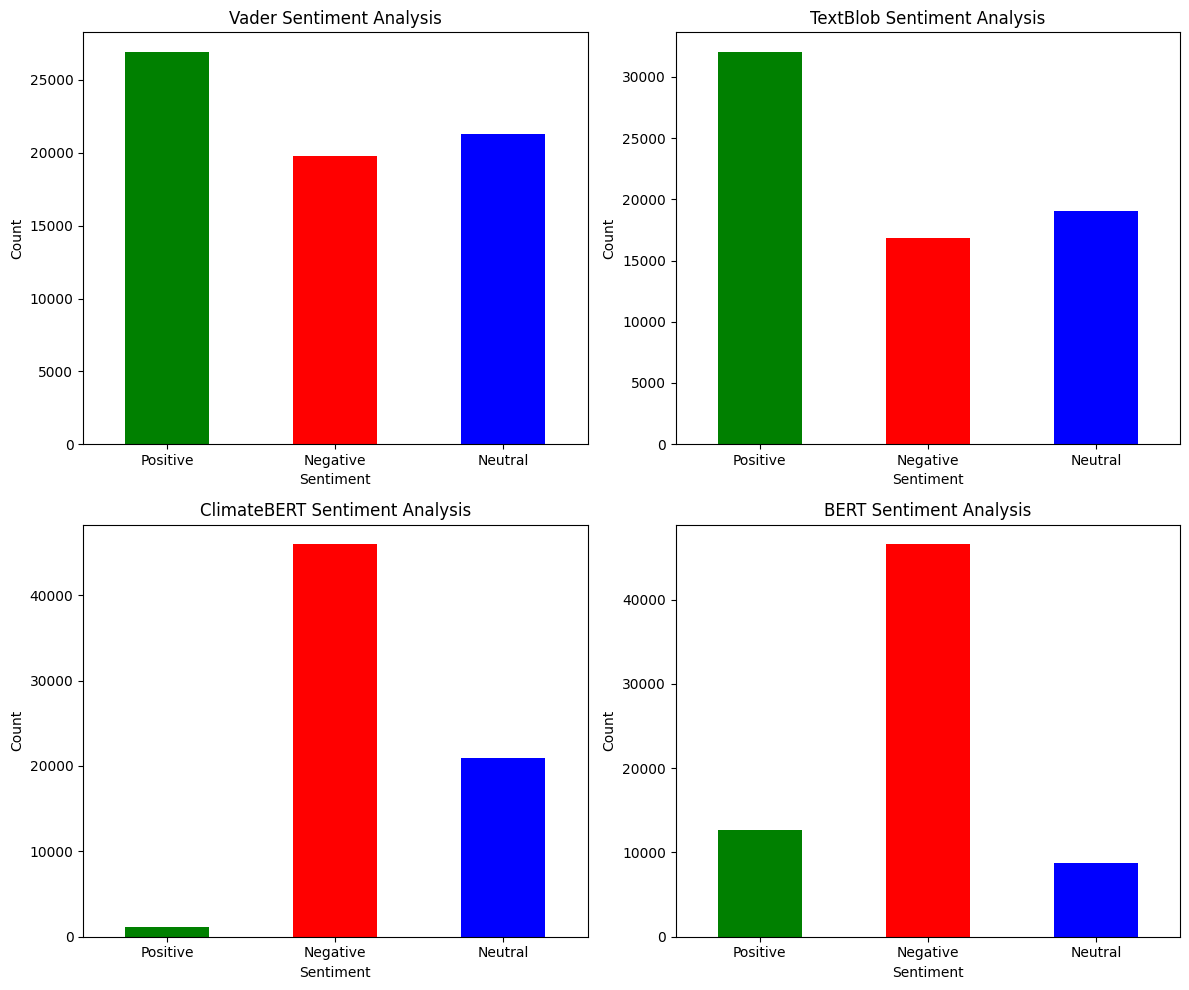

Image saved at: /kaggle/working/sentiment_analysis_plot.png


In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences for each sentiment
vader_sentiment_counts = df_merge["sentiment_vader"].value_counts().reindex(["Positive", "Negative", "Neutral"], fill_value=0)
textblob_sentiment_counts = df_merge["Sentiment_textblob"].value_counts().reindex(["Positive", "Negative", "Neutral"], fill_value=0)
climatebert_counts = df_merge["Sentiment_Climatebert"].value_counts().reindex(["Positive", "Negative", "Neutral"], fill_value=0)
bert_counts = df_merge["Sentiment_bert"].value_counts().reindex(["Positive", "Negative", "Neutral"], fill_value=0)

# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define colors
colors = ["green", "red", "blue"]

# Plot each sentiment distribution
vader_sentiment_counts.plot(kind="bar", color=colors, ax=axes[0,0])
textblob_sentiment_counts.plot(kind="bar", color=colors, ax=axes[0,1])
climatebert_counts.plot(kind="bar", color=colors, ax=axes[1,0])
bert_counts.plot(kind="bar", color=colors, ax=axes[1,1])

# Set titles and labels
axes[0,0].set_title("Vader Sentiment Analysis")
axes[0,1].set_title("TextBlob Sentiment Analysis")
axes[1,0].set_title("ClimateBERT Sentiment Analysis")
axes[1,1].set_title("BERT Sentiment Analysis")

for ax in axes.flat:
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=0)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
image_path = "/kaggle/working/sentiment_analysis_plot.png"
plt.savefig(image_path, dpi=300, bbox_inches="tight")  # Save as PNG
plt.show()

print(f"Image saved at: {image_path}")

<ipython-input-94-da441bfaec55>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_1["year"] = pd.to_datetime(new_df_1["datetime"]).dt.year
<ipython-input-94-da441bfaec55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_2["year"] = pd.to_datetime(new_df_2["datetime"]).dt.year


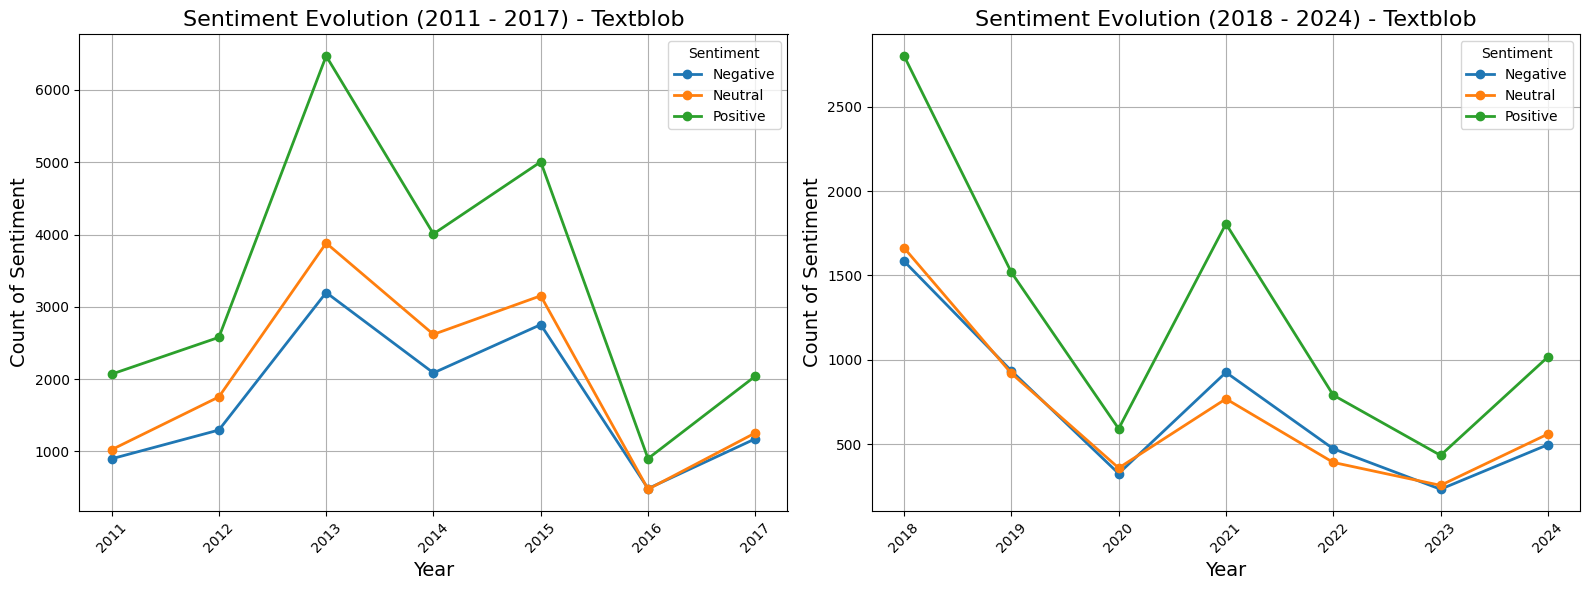

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Convert datetime column to year
new_df_1["year"] = pd.to_datetime(new_df_1["datetime"]).dt.year
new_df_2["year"] = pd.to_datetime(new_df_2["datetime"]).dt.year

# Group by year and sentiment, then count occurrences
sentiment_yearly_1 = new_df_1.groupby(["year", "Sentiment_textblob"]).size().unstack(fill_value=0)
sentiment_yearly_2 = new_df_2.groupby(["year", "Sentiment_textblob"]).size().unstack(fill_value=0)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Line Plot: Evolution of Sentiments over time for new_df_1
sentiment_yearly_1.plot(kind="line", marker="o", linestyle="-", linewidth=2, markersize=6, ax=axes[0])
axes[0].set_title("Sentiment Evolution (2011 - 2017) - Textblob", fontsize=16)
axes[0].set_xlabel("Year", fontsize=14)
axes[0].set_ylabel("Count of Sentiment", fontsize=14)
axes[0].grid(True)
axes[0].tick_params(axis="x", rotation=45)
axes[0].legend(title="Sentiment")

# Line Plot: Evolution of Sentiments over time for new_df_2
sentiment_yearly_2.plot(kind="line", marker="o", linestyle="-", linewidth=2, markersize=6, ax=axes[1])
axes[1].set_title("Sentiment Evolution (2018 - 2024) - Textblob", fontsize=16)
axes[1].set_xlabel("Year", fontsize=14)
axes[1].set_ylabel("Count of Sentiment", fontsize=14)
axes[1].grid(True)
axes[1].tick_params(axis="x", rotation=45)
axes[1].legend(title="Sentiment")

# Adjust layout
plt.tight_layout();

# Save the plot as an image in Kaggle working directory
plt.savefig("/kaggle/working/sentiment_evolution.png", dpi=300, bbox_inches="tight")

# Show the plots
plt.show();


In [ ]:
df_merge.columns

Index(['post_number', 'post_id', 'datetime', 'user', 'text', 'new_text',
       'corrected_clean', 'tokens', 'lemmatized', 'sentiment_vader',
       'Sentiment_textblob', 'Sentiment_Climatebert', 'Sentiment_bert'],
      dtype='object')

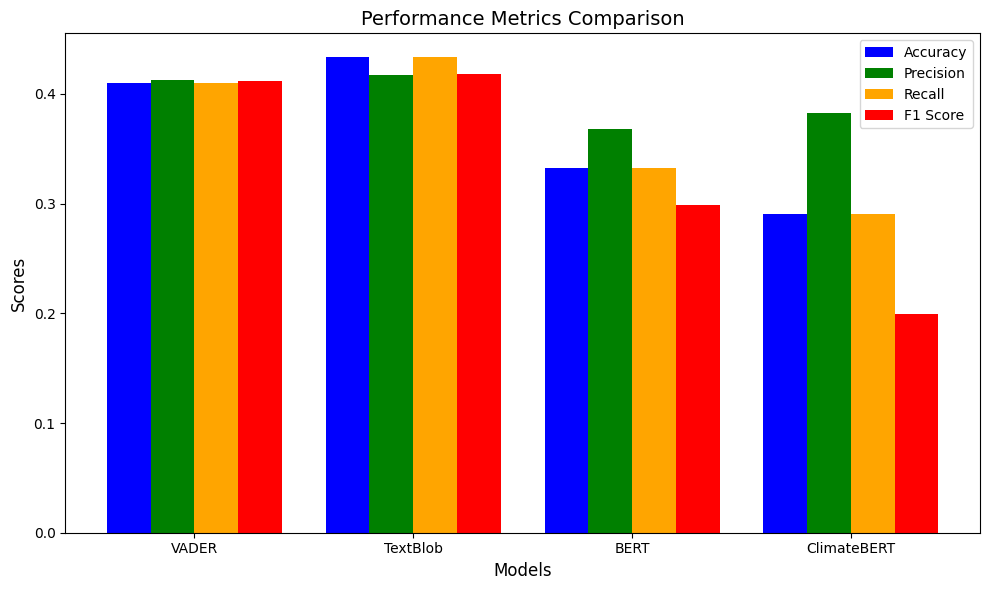

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["VADER", "TextBlob", "BERT", "ClimateBERT"]

# Metrics for each model
accuracy = [0.410084, 0.433613, 0.332773, 0.290756]
precision = [0.413080, 0.417427, 0.368224, 0.382373]
recall = [0.410084, 0.433613, 0.332773, 0.290756]
f1_score = [0.411381, 0.418270, 0.298575, 0.199483]

# Set up the bar width
bar_width = 0.2
index = np.arange(len(models))

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each metric as a group of bars
bar1 = ax.bar(index - 1.5*bar_width, accuracy, bar_width, label='Accuracy', color='blue')
bar2 = ax.bar(index - 0.5*bar_width, precision, bar_width, label='Precision', color='green')
bar3 = ax.bar(index + 0.5*bar_width, recall, bar_width, label='Recall', color='orange')
bar4 = ax.bar(index + 1.5*bar_width, f1_score, bar_width, label='F1 Score', color='red')

# Set titles and labels
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Performance Metrics Comparison', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels(models, fontsize=10)
ax.legend()

# Save the plot as an image in Kaggle working directory
plt.tight_layout()
plt.savefig("/kaggle/working/model_comparison_metrics.png", dpi=300)

# Show the plot
plt.show()


In [ ]:
from IPython.display import FileLink
FileLink("/kaggle/working/model_comparison_metrics.png")


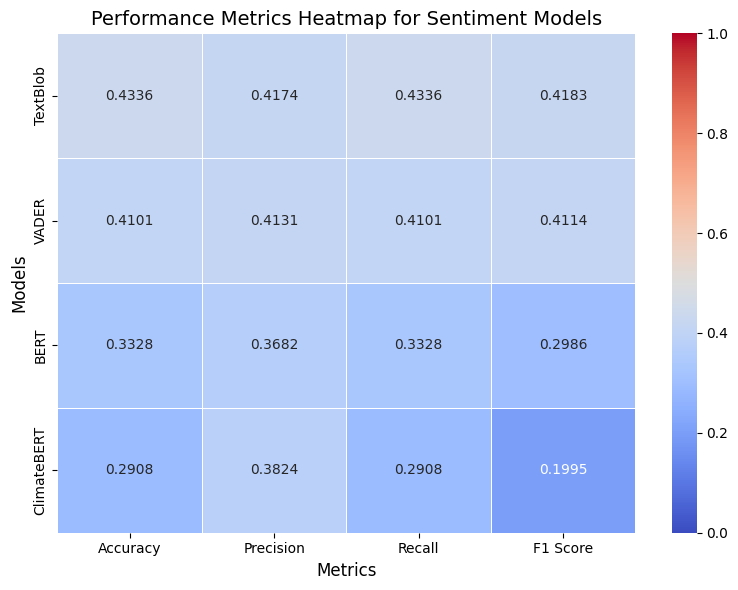

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with performance metrics for each model
data = {
    "Accuracy": [0.410084, 0.433613, 0.332773, 0.290756],
    "Precision": [0.413080, 0.417427, 0.368224, 0.382373],
    "Recall": [0.410084, 0.433613, 0.332773, 0.290756],
    "F1 Score": [0.411381, 0.418270, 0.298575, 0.199483]
}

models = ["VADER", "TextBlob", "BERT", "ClimateBERT"]

# Create a DataFrame
df = pd.DataFrame(data, index=models)

# Calculate the average score for each model across the metrics
df['Average'] = df.mean(axis=1)

# Sort models by average score in descending order (higher values on top)
df_sorted = df.sort_values(by='Average', ascending=False)

# Drop the 'Average' column after sorting
df_sorted = df_sorted.drop(columns='Average')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_sorted, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5, vmin=0, vmax=1)

# Set title and labels
plt.title("Performance Metrics Heatmap for Sentiment Models", fontsize=14)
plt.ylabel("Models", fontsize=12)
plt.xlabel("Metrics", fontsize=12)

# Save the heatmap image
plt.tight_layout()
plt.savefig("/kaggle/working/sorted_sentiment_model_heatmap.png", dpi=300)

# Show the heatmap
plt.show()


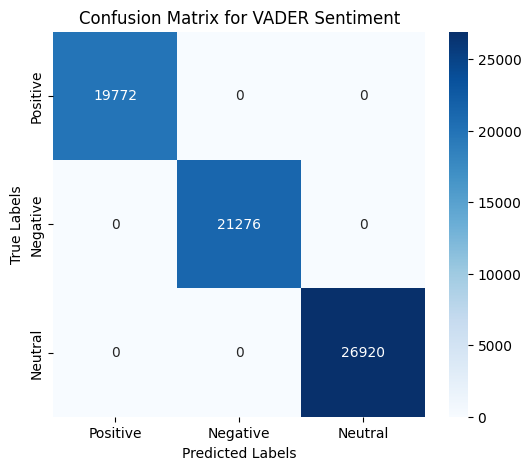

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example for one model (e.g., Vader)
cm = confusion_matrix(df_merge["sentiment_vader"], df_merge["sentiment_vader"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative", "Neutral"], yticklabels=["Positive", "Negative", "Neutral"])
plt.title("Confusion Matrix for VADER Sentiment")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example for one model (e.g., Vader)
cm = confusion_matrix(df_merge["Sentiment_bert"], df_merge["Sentiment_bert"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative", "Neutral"], yticklabels=["Positive", "Negative", "Neutral"])
plt.title("Confusion Matrix for BERT Sentiment")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
df_merge.columns

Index(['post_number', 'post_id', 'datetime', 'user', 'text', 'new_text',
       'corrected_clean', 'tokens', 'lemmatized', 'sentiment_vader',
       'Sentiment_textblob', 'Sentiment_Climatebert', 'Sentiment_bert'],
      dtype='object')

In [ ]:
df_merge['Sentiment_Climatebert'].value_counts()

Sentiment_Climatebert
Negative    45932
Neutral     20936
Positive     1100
Name: count, dtype: int64

In [ ]:
df_merge['Sentiment_bert'].value_counts()

Sentiment_bert
Negative    46543
Positive    12687
Neutral      8738
Name: count, dtype: int64

In [ ]:
df_merge['Sentiment_textblob'].value_counts()

Sentiment_textblob
Positive    32029
Neutral     19078
Negative    16861
Name: count, dtype: int64

In [ ]:
df_merge['sentiment_vader'].value_counts()

sentiment_vader
Positive    26920
Neutral     21276
Negative    19772
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example for one model (e.g., Vader)
cm = confusion_matrix(df_merge["Sentiment_bert"], df_merge["Sentiment_bert"])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative", "Neutral"], yticklabels=["Positive", "Negative", "Neutral"])
plt.title("Confusion Matrix for BERT Sentiment")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
